In [37]:
import time
from astropy.table import Table, Column
from sklearn import preprocessing
import os
#import astropy.io.fits as pyfits
#import numpy as np
start_time=time.time()
# selection parameters
tab=Table.read('C4N5REWs_DR12v11_all.fits')
z_dr12=tab['z_dr12']
ABw3_snr=tab['ABw3_snr']

rew_gf=tab['rew_gf']
rewe_gf=tab['rewe_gf']
ratio_rew=  rew_gf/rewe_gf#tab['rewsnr_gf']
fwhm=tab['fwhm_gf']
fwhme=tab['fwhme_gf']
ratio_fwhm= fwhm/fwhme #tab['fwhmsnr_gf']
qflag=tab['qflag']
nvflag=tab['nvflag']
imw3= tab['i-w3']
# W3=tab['W3']
bal_flag_vi = tab['bal_flag_vi']
ccFlag = tab['cc_flags']
bi_civ = tab['bi_civ']
err_bi_civ = tab['err_bi_civ']
# making new table

<ipython-input-38-af039a565100>:13: RuntimeWarning: invalid value encountered in log10
  plt.scatter(imw3[(imw3>0) & (rew_gf<1000) & (ratio_rew < 2)], np.log10(rew_gf[(imw3>0 )


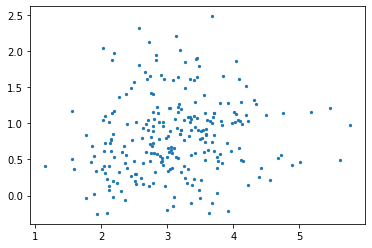

In [38]:
#  Checking why lower right of rew-color PS is empty
import matplotlib.pyplot as plt
import numpy as np
# plt.scatter(imw3[(imw3>0) & (rew_gf<1000) & (ratio_fwhm > 10)], np.log10(rew_gf[(imw3>0 )
#                 & (rew_gf<1000) & (ratio_fwhm > 10)]),
#             alpha=0.3, s=5)
# plt.scatter(imw3[(imw3>0) & (rew_gf<1000)  & (rewe_gf>0
#                                              )], np.log10(rew_gf[(imw3>0 )
#                 & (rew_gf<1000) & (rewe_gf>0)]), alpha=0.3, s=5, c= ratio_rew[(imw3>0) & 
#                                                              (rew_gf<1000) & (rewe_gf>0)], 
#            cmap='coolwarm')
# plt.colorbar()
plt.scatter(imw3[(imw3>0) & (rew_gf<1000) & (ratio_rew < 2)], np.log10(rew_gf[(imw3>0 )
                & (rew_gf<1000) & (ratio_rew < 2)]),
            alpha=1, s=5)
# plt.scatter(imw3[(imw3>0) & (rew_gf<1000) & (ABw3_snr < 3)], np.log10(rew_gf[(imw3>0 )
#                 & (rew_gf<1000) & (ABw3_snr < 3)]),
#             alpha=.4, s=5, c='r')


In [39]:
#count=-1
row=len(tab)
rm=[]
k = 0
j = 0
m = 0
for i in range(0,row):
    if  (fwhm[i]<2000) or ((imw3[i]) < 0.8) or (z_dr12[i]<2.0) or \
      (z_dr12[i]>3.4) or (ABw3_snr[i] < 3) or (ratio_rew[i] < 3.0) or \
      (ratio_fwhm[i] < 4) or (qflag[i] != 0) or (ccFlag[i]!='0000'):
      # or nvflag[i] != 0:
            
            # or (bal_flag_vi[i] > 0) 
            # or nvflag[i] != 0
             rm.append(i)
    else:
        k = k+1
        if imw3[i] >= 4.6: j = j+1
        if imw3[i] >= 4.6 and rew_gf[i] >= 100.0: m = m+1


print('total T1s =',k, ', T1 ERQs =', j, ', core T1 ERQs =', m)

tab.remove_rows(rm)
out='FullSample.fits'
if os.path.exists(out):
      os.remove(out)

tab.write(out)

total T1s = 36268 , T1 ERQs = 161 , core T1 ERQs = 72
